In [102]:
%matplotlib inline
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from datetime import datetime

In [103]:
#load csv file
df = pd.read_csv("clean_whatsapp.csv", dtype=str)

In [104]:
#Extend view
#Change display option to increase number of row
pd.set_option('display.max_row',60);

In [105]:
#view data
df.head()

,Unnamed: 0,date,phone,message
0,0,"22/03/2019, 07:46",+61459847002,I am a cat
1,1,"22/03/2019, 07:49",+2347062612782,"Funny job, but I'll do it"
2,2,"23/03/2019, 07:52",+2348059872748,"Hahahahah, I don't like chasing stars"
3,3,"23/03/2019, 07:56",+2348069087511,You are saying funny abi things 🤪🤣😀😀
4,4,"23/03/2019, 07:57",+2348064487511,If you know how big i am...you won't talk lik...


In [106]:
#Convert date to timestamp
df['date'] = pd.to_datetime(df['date'], format='%d/%m/%Y, %H:%M')

In [107]:
df["day"] = df["date"].dt.day_name()

In [108]:
df.head()

,Unnamed: 0,date,phone,message,day
0,0,2019-03-22 07:46:00,+61459847002,I am a cat,Friday
1,1,2019-03-22 07:49:00,+2347062612782,"Funny job, but I'll do it",Friday
2,2,2019-03-23 07:52:00,+2348059872748,"Hahahahah, I don't like chasing stars",Saturday
3,3,2019-03-23 07:56:00,+2348069087511,You are saying funny abi things 🤪🤣😀😀,Saturday
4,4,2019-03-23 07:57:00,+2348064487511,If you know how big i am...you won't talk lik...,Saturday


In [109]:
#melt data
df_melt = df.melt(id_vars = ['day'],
                  value_vars = ['date'],
                  var_name = 'columns')

df_melt.head()

,day,columns,value
0,Friday,date,2019-03-22 07:46:00
1,Friday,date,2019-03-22 07:49:00
2,Saturday,date,2019-03-23 07:52:00
3,Saturday,date,2019-03-23 07:56:00
4,Saturday,date,2019-03-23 07:57:00


In [110]:
#Sort plot data
x = np.sort(df_melt["day"].unique())
y = df_melt["day"].value_counts()

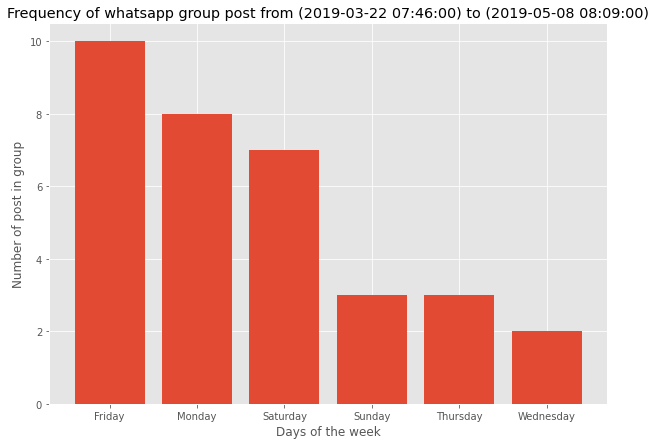

In [111]:
plt.style.use('ggplot')
fig= plt.subplots(figsize =(10, 7))
plt.bar(x, y, width=0.8, bottom=None, align='center')
mi = df["date"].min()
ma = df["date"].max()
plt.xlabel("Days of the week")
plt.ylabel("Number of post in group")
plt.title(f"Frequency of whatsapp group post from ({mi}) to ({ma})")
plt.show()

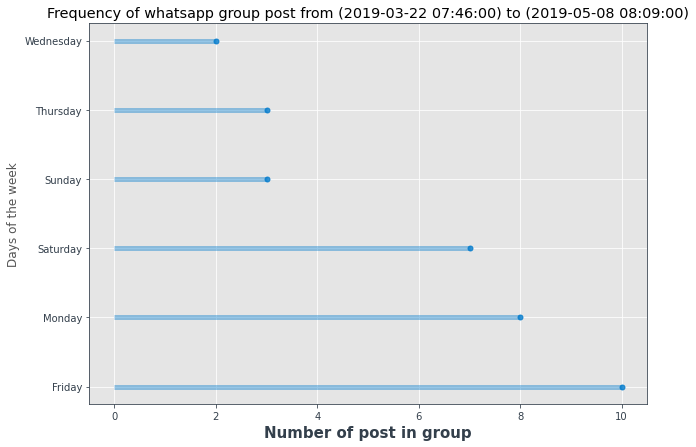

In [112]:
#Fancy plot

#set axis style
plt.rcParams['axes.edgecolor']='#333F4B'
plt.rcParams['axes.linewidth']=0.8
plt.rcParams['xtick.color']='#333F4B'
plt.rcParams['ytick.color']='#333F4B'

#draw line
fig, ax = plt.subplots(figsize=(10,7))
plt.hlines(y=x, xmin=0, xmax=y, color='#007acc', alpha=0.4, linewidth=5)

#draw target
plt.plot(y, x, "o", markersize=5, color='#007acc', alpha=0.8)

# set labels style
ax.set_xlabel("Number of post in group", fontsize=15, fontweight='black', color = '#333F4B')
ax.set_ylabel("Days of the week")

mi = df["date"].min()
ma = df["date"].max()
plt.title(f"Frequency of whatsapp group post from ({mi}) to ({ma})")
plt.show()